## Task A

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
masked_path = "dataset/with_mask"
unmasked_path = "dataset/without_mask"


In [ ]:

def load_images(path,label):
    images = []
    labels = []
    for filename in os.listdir(path):
        img_path = path + "/" + filename
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img,(128,128)) 
        images.append(img)
        labels.append(label)
    
    return images,labels


In [ ]:

masked_images, masked_labels = load_images(masked_path, label=1)
unmasked_images, unmasked_labels = load_images(unmasked_path, label=0)


In [ ]:

entire_images = masked_images + unmasked_images
entire_labels = masked_labels + unmasked_labels


In [ ]:

X = np.array(entire_images)
Y = np.array(entire_labels)

In [ ]:
def extract_features(images):
    features = []
    for img in images:
        hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                           orientations=9, feature_vector=True)

        features.append(hog_features)
    
    return np.array(features)

In [ ]:
X_features = extract_features(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, Y, test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))

SVM Accuracy: 0.9165644171779141
Confusion Matrix:
 [[325  37]
 [ 31 422]]


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [ ]:
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Classifier Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

MLP Classifier Accuracy: 93.25%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       362
           1       0.93      0.94      0.94       453

    accuracy                           0.93       815
   macro avg       0.93      0.93      0.93       815
weighted avg       0.93      0.93      0.93       815

Confusion Matrix:
 [[332  30]
 [ 25 428]]


In [ ]:
image_path = "test_2.jpg"  # Replace with your image path
image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
images = []
if image is None:
    print("Error loading image!")
else:
    image = cv2.resize(image,(128,128))
    images.append(image)
    feature_vector = extract_features(images) # Reshape for prediction

    # Predict using the MLP model
    prediction = mlp.predict(feature_vector)
    
    
    print(f"Prediction: {prediction}")

Prediction: [1]


In [ ]:
def test_image(path):
    test_images = []
    test_image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(test_image,(128,128))
    test_images.append(img)
    test_array = np.array(test_images)
    test_features = extract_features(test_array)
    print("SVM model output : ",svm_model.predict(test_features)[0])
    print("Neural network(MLP) model output : ",mlp.predict(test_features))
    

In [ ]:
test_image("image.png")

SVM model output :  0
Neural network(MLP) model output :  [0]


## Task B

Classes found: ['with_mask', 'without_mask']
Training samples: 3273, Validation samples: 819


d:\anaconda\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 57s 416ms/step - accuracy: 0.7331 - loss: 0.7092 - val_accuracy: 0.9109 - val_loss: 0.2044
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 47s 400ms/step - accuracy: 0.9195 - loss: 0.2324 - val_accuracy: 0.8889 - val_loss: 0.2800
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 48s 418ms/step - accuracy: 0.9196 - loss: 0.2019 - val_accuracy: 0.9463 - val_loss: 0.1457
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 47s 406ms/step - accuracy: 0.9463 - loss: 0.1434 - val_accuracy: 0.9414 - val_loss: 0.1691
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 48s 415ms/step - accuracy: 0.9392 - loss: 0.1601 - val_accuracy: 0.9084 - val_loss: 0.2620
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 48s 418ms/step - accuracy: 0.9507 - loss: 0.1244 - val_accuracy: 0.9512 - val_loss: 0.1306
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 49s 424ms/step - accuracy: 0.9786 - loss: 0.0619 - val_accuracy: 0.9658 - val_loss: 0.1091
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 48s 390ms/step - accuracy: 0.9861 - loss: 0

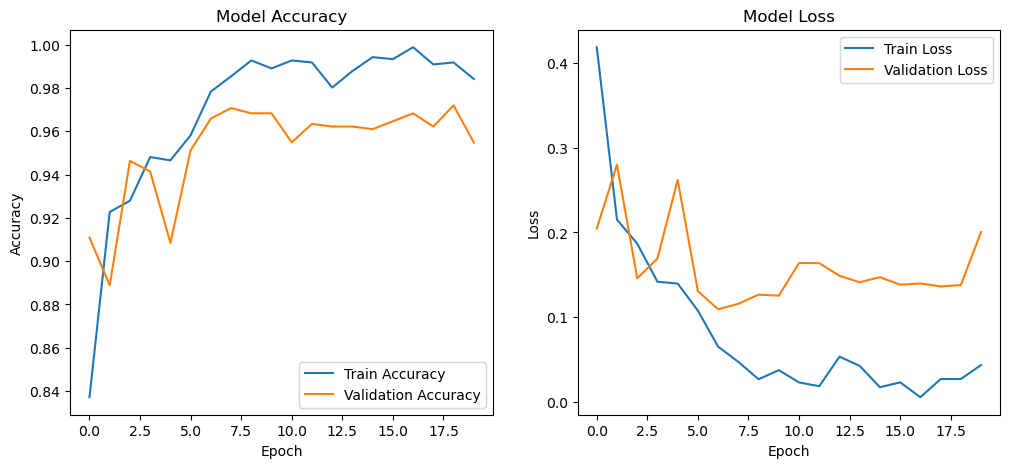

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_dir = 'dataset'

class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
print("Classes found:", class_names)

# Manually collect image paths and corresponding labels
image_paths = []
labels = []
for label, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for file in os.listdir(class_dir):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(class_dir, file))
            labels.append(label)

image_paths = np.array(image_paths)
labels = np.array(labels)

# Split into training and validation sets (80/20 split)
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=123, stratify=labels
)

print(f"Training samples: {len(train_paths)}, Validation samples: {len(val_paths)}")

# Define a function to load and preprocess images
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    # decode_image handles JPEG and PNG automatically
    image = tf.image.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.resize(image, [150, 150])
    image = image / 255.0  # normalize to [0, 1]
    return image, label

# Create tf.data.Datasets for training and validation
batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_ds = train_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(buffer_size=len(train_paths)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
val_ds = val_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Build a CNN model for binary classification
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


In [ ]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.9556 - loss: 0.1768
Validation Loss: 0.2005
Validation Accuracy: 95.48%


In [ ]:
# Define a helper function to build a model with specified hyperparameters
def build_model(learning_rate, optimizer_name):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output
    ])
    
    # Choose optimizer based on parameter
    if optimizer_name.lower() == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name.lower() == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    else:
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameter grid for grid search
learning_rates = [0.001, 0.0005, 0.005]
batch_sizes = [16, 32]
optimizers_list = ['adam', 'sgd']
grid_epochs = 2  


grid_results = []


for lr in learning_rates:
    for bs in batch_sizes:
        for opt_name in optimizers_list:
            print(f"Testing combination: LR={lr}, Batch Size={bs}, Optimizer={opt_name}")
            
            model_temp = build_model(learning_rate=lr, optimizer_name=opt_name)
            
            train_ds_temp = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
            train_ds_temp = train_ds_temp.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
            train_ds_temp = train_ds_temp.shuffle(buffer_size=len(train_paths)).batch(bs).prefetch(tf.data.AUTOTUNE)
            
            val_ds_temp = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
            val_ds_temp = val_ds_temp.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
            val_ds_temp = val_ds_temp.batch(bs).prefetch(tf.data.AUTOTUNE)
            
            history_temp = model_temp.fit(train_ds_temp, validation_data=val_ds_temp,
                                          epochs=grid_epochs, verbose=0)
            
            final_val_acc = history_temp.history['val_accuracy'][-1]
            grid_results.append((lr, bs, opt_name, final_val_acc))
            print(f"Final validation accuracy: {final_val_acc:.4f}\n")

print("Grid Search Results:")
for res in grid_results:
    print(f"LR: {res[0]}, Batch Size: {res[1]}, Optimizer: {res[2]} -> Val Accuracy: {res[3]:.4f}")


Testing combination: LR=0.001, Batch Size=16, Optimizer=adam
Final validation accuracy: 0.9133

Testing combination: LR=0.001, Batch Size=16, Optimizer=sgd
Final validation accuracy: 0.8877

Testing combination: LR=0.001, Batch Size=32, Optimizer=adam
Final validation accuracy: 0.9255

Testing combination: LR=0.001, Batch Size=32, Optimizer=sgd
Final validation accuracy: 0.8230

Testing combination: LR=0.0005, Batch Size=16, Optimizer=adam
Final validation accuracy: 0.9353

Testing combination: LR=0.0005, Batch Size=16, Optimizer=sgd
Final validation accuracy: 0.8755

Testing combination: LR=0.0005, Batch Size=32, Optimizer=adam
Final validation accuracy: 0.9292

Testing combination: LR=0.0005, Batch Size=32, Optimizer=sgd
Final validation accuracy: 0.8278

Testing combination: LR=0.005, Batch Size=16, Optimizer=adam
Final validation accuracy: 0.5287

Testing combination: LR=0.005, Batch Size=16, Optimizer=sgd
Final validation accuracy: 0.8974

Testing combination: LR=0.005, Batch Size

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

def detect_and_classify_mask(model, image_path, threshold=0.5, show_result=True):
    
    image_bgr = cv2.imread(image_path)
    if image_bgr is None:
        print("Could not read image:", image_path)
        return
    
    image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.3, minNeighbors=5)
    
    if len(faces) == 0:
        print("No faces detected in:", image_path)
        return
    
    # For each face, crop and classify
    for (x, y, w, h) in faces:
        face_bgr = image_bgr[y:y+h, x:x+w]
        
        
        face_rgb = cv2.cvtColor(face_bgr, cv2.COLOR_BGR2RGB)
        face_rgb = cv2.resize(face_rgb, (150, 150))
        face_rgb = face_rgb.astype('float32') / 255.0
        face_rgb = np.expand_dims(face_rgb, axis=0)
        
        # Predict
        prediction = model.predict(face_rgb)[0][0] 
        label = "with_mask" if prediction < threshold else "without_mask"
        print(f"Raw model output: {prediction}")
        print(f"Detected face in {image_path}: raw={prediction:.4f} => {label}")
        
        if show_result:
            cv2.rectangle(image_bgr, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(
                image_bgr, label, 
                (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 
                0.9, (0, 255, 0), 2
            )
    
    if show_result:
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(6, 6))
        plt.imshow(image_rgb)
        plt.axis("off")
        plt.title(f"Results for {image_path}")
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Raw model output: 1.923737727338448e-06
Detected face in dataset/with_mask/with_mask654.jpeg: raw=0.0000 => with_mask


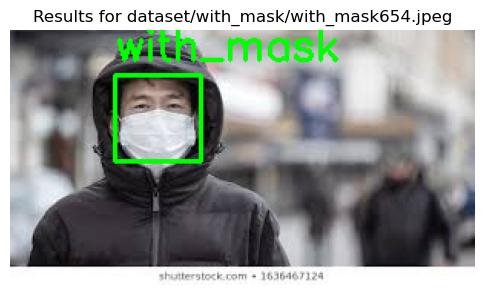

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Raw model output: 1.0
Detected face in dataset/without_mask/83.jpg: raw=1.0000 => without_mask


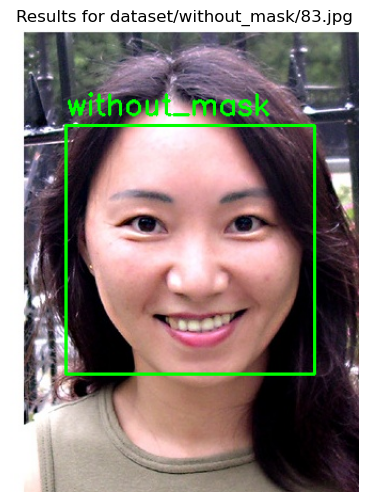

In [ ]:
image_path_mask = "dataset/with_mask/with_mask654.jpeg"  # Person with an actual mask
image_path_no_mask1 = "dataset/without_mask/83.jpg"      # Person not wearing a mask

detect_and_classify_mask(model, image_path_mask, threshold=0.5, show_result=True)
detect_and_classify_mask(model, image_path_no_mask1, threshold=0.5, show_result=True)
